# Ploynomial Regression with sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0) # so that random values are always repeated
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Defining dataset

original polynom is $-x^2 + 1$

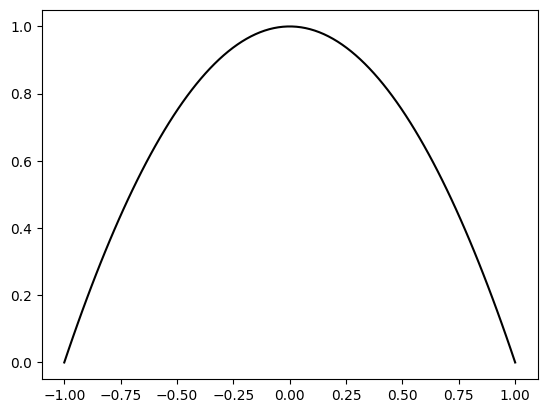

In [2]:
coefs = [1, 0, -1] # the coefficients at x^0, x^1, x^2

# calculate y for input x
def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i] * x ** i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 100)
    plt.plot(x, polynomial(coefs = coefs, x = x), linestyle = '-', color = 'black')

draw_polynomial(coefs)

## Creating dataset close to this polynomial

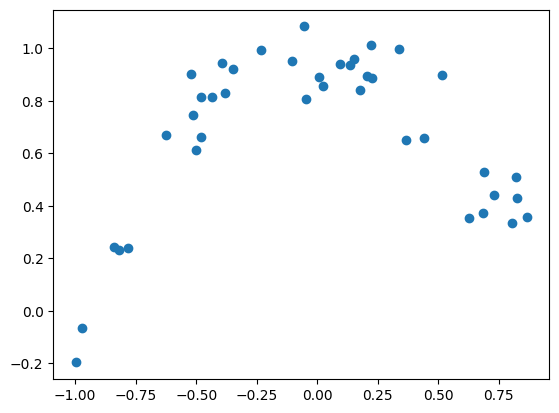

In [3]:
X = [] # x - general features
Y = []
for i in range(40):
    x = random.uniform(-1, 1) # for float generating instead of an integer
    y = polynomial(coefs, x) + random.gauss(0, 0.1) # generate noise with gaussian distribution
    X.append(x)
    Y.append(y)
    
plt.scatter(X, Y)

## The overfitting example

In [4]:
from func import *

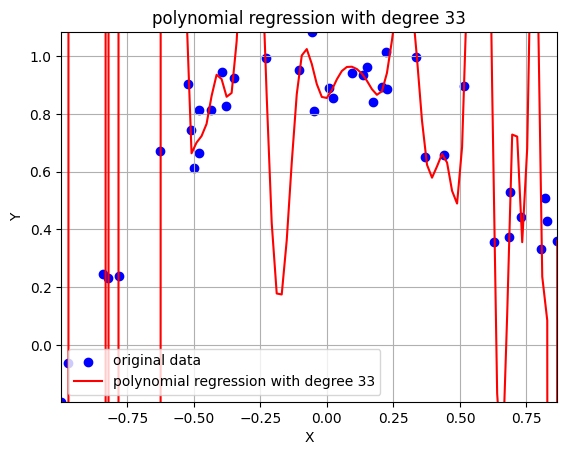

ploynomial regression with degree 33 has coefficients: [-2.54163907e+09  8.10930157e-01  4.49286960e+01 -4.97169361e+02
 -3.79838026e+03  6.41135015e+04  6.62459815e+03 -2.89088458e+06
  5.00746472e+06  6.61511907e+07 -1.59080322e+08 -9.01956005e+08
  2.45167511e+09  7.94275903e+09 -2.31533873e+10 -4.70995835e+10
  1.46088856e+11  1.91292611e+11 -6.41508360e+11 -5.29238414e+11
  1.99686240e+12  9.59572114e+11 -4.42097652e+12 -1.00175973e+12
  6.89215329e+12  2.44972642e+11 -7.36988164e+12  8.07586300e+11
  5.13027081e+12 -1.12850401e+12 -2.08873231e+12  6.33584936e+11
  3.76595729e+11 -1.37495418e+11]
ploynomial regression with degree 33 has intercept: 2541639071.098941


In [ ]:
degree = 30

wieghts_degree, intercept_degree = train_plot_reg(X, Y, degree)
print(f'ploynomial regression with degree {degree} has coefficients: {wieghts_degree}')
print(f'ploynomial regression with degree {degree} has intercept: {intercept_degree}')

## Split data into training ad testing


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 52) # 80% for training, 20% for testing
# random_state = 52 for reproducibility

print(f'X_train shape: {np.shape(X_train)}')
print(f'X_train: {X_train[:5]}')
print(f'Y_train shape: {np.shape(Y_train)}')
print(f'X_test shape: {np.shape(X_test)}')
print(f'Y_test shape: {np.shape(Y_test)}')


X_train shape: (32,)
X_train: [-0.512178246225736, -0.04680609169528838, 0.8043319008791654, -0.4989873172751189, -0.055714569094573285]
Y_train shape: (32,)
X_test shape: (8,)
Y_test shape: (8,)


## Training a polynomial regression model with no regularization

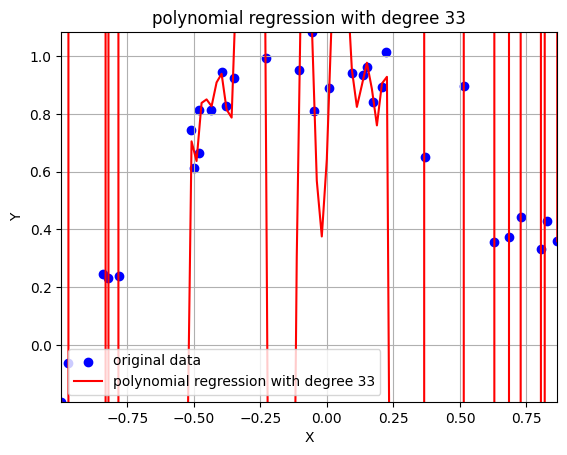

(array([ 7.34809761e+11,  2.35704657e+01,  3.42404238e+02, -9.03707911e+03,
       -4.63351245e+04,  1.04289967e+06,  2.10504290e+06, -4.97209177e+07,
       -6.48341544e+07,  1.24110832e+09,  1.61289126e+09, -1.77776025e+10,
       -2.68604628e+10,  1.50270241e+11,  2.64694086e+11, -7.58329916e+11,
       -1.53033895e+12,  2.27133882e+12,  5.23288994e+12, -3.83226299e+12,
       -1.02049493e+13,  3.04497299e+12,  9.30773816e+12, -5.75634605e+11,
        1.11109703e+12,  9.13860473e+11, -8.17364458e+12, -1.94283827e+12,
        1.18733207e+12, -2.34205503e+12,  6.22060177e+12,  5.95348127e+12,
       -3.42741614e+12, -2.90353253e+12]), -734809761364.4758)


In [7]:
coefficients_intercept = train_plot_reg(X_train, Y_train, degree)
print(coefficients_intercept)


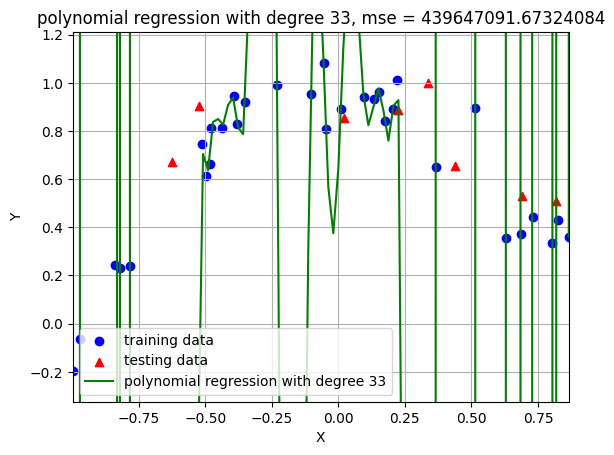

square loss: 439647091.67324084


In [8]:
square_loss = predict_evaluate(coefficients_intercept, degree, X_train, Y_train, X_test, Y_test)
print(f'square loss: {square_loss}')